# ggplot2

The `ggplot2` package helps you plot graphics with a `grammar`. The grammar provides a way to talk about parts of a plot. The grammar talks about the following `components` of a plot.

* `data` is what is being plotted
* `geometric objects` are the shapes and lines that appear on the plot
* `aesthetics` are the appearance of the geometric objects and the mapping of variables to such aesthetics
* `position adjustment` is the placement of elements
* `scale` is the range of values for each aesthetic mapping
* `coordinate system` is used to organize the geometric objects
* `facets` are groupos of data shown in differen plots

## Geometries

### geom_point

The `geom_point` is used for drawing individual points.

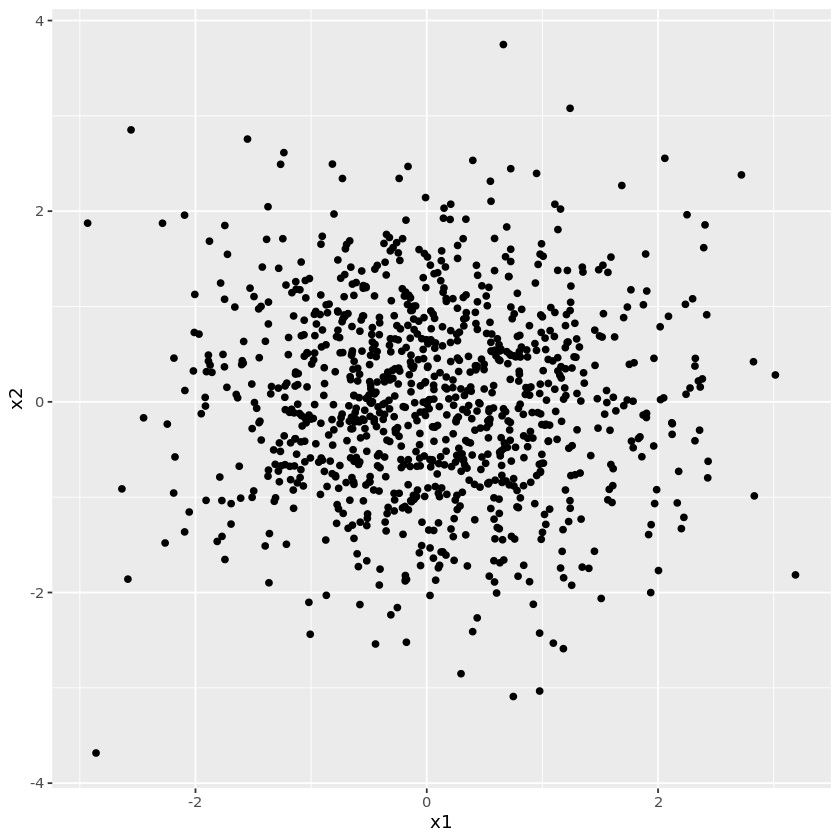

In [1]:
library('ggplot2')

df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2))

### geom_hex

The `geom_hex` function is used for drawing individual points as hexagons.

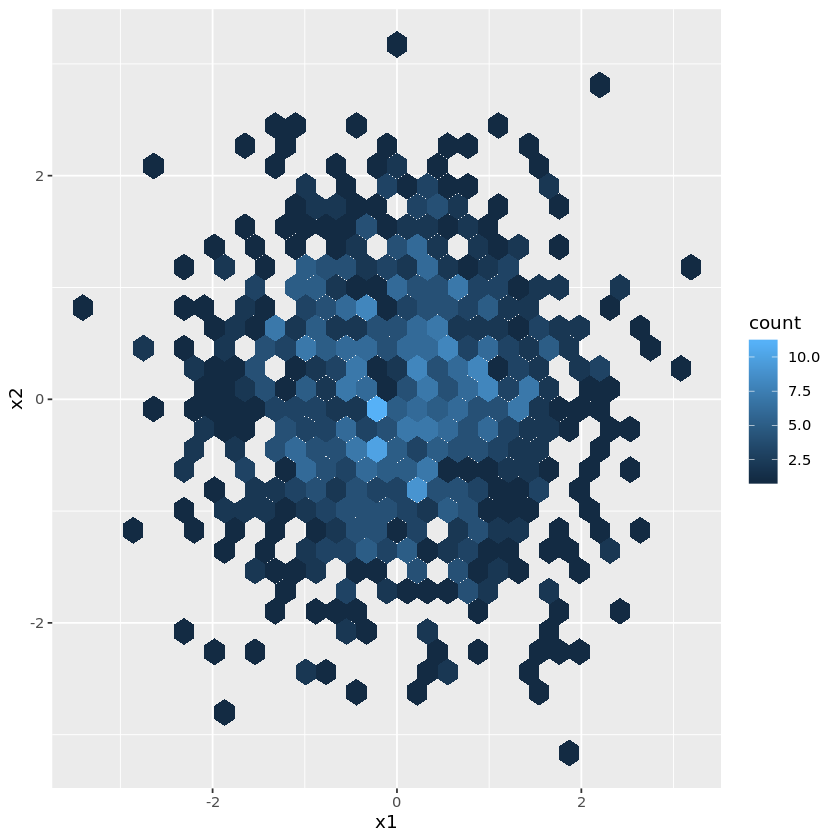

In [2]:
df <- data.frame(
    x1 = rnorm(1000),
    x2 = rnorm(1000)
)

ggplot(df) +
    geom_hex(mapping=aes(x=x1, y=x2))

### geom_line

The `geom_line` function is used for drawing lines.

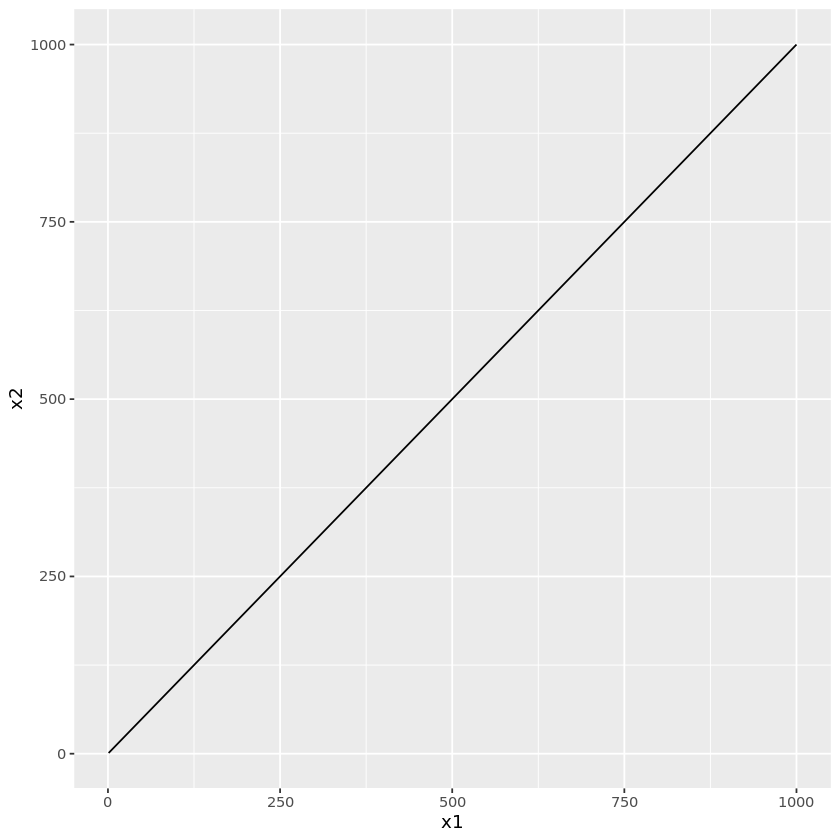

In [3]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000)
)

ggplot(df) +
    geom_line(mapping=aes(x=x1, y=x2))

### geom_smooth

The `geom_smooth` function is used to draw a smoothed line.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


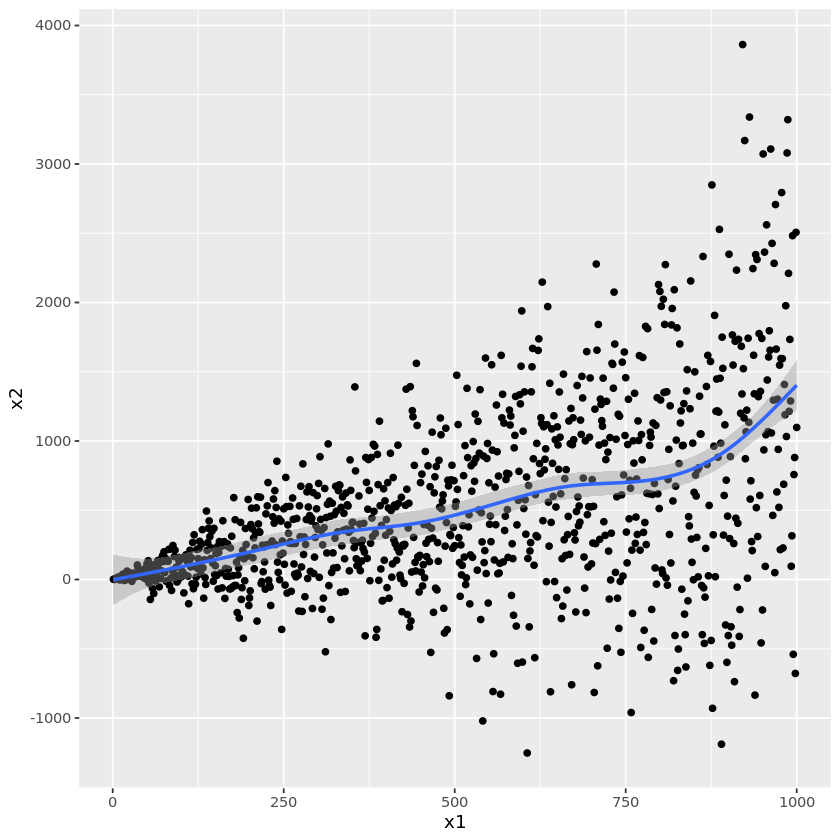

In [4]:
df <- data.frame(
    x1 = seq(1, 1000),
    x2 = seq(1, 1000) + (rnorm(1000) * seq(1, 1000))
)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2)) +
    geom_smooth(mapping=aes(x=x1, y=x2))

### geom_col

The `geom_col` function is used to draw bars.

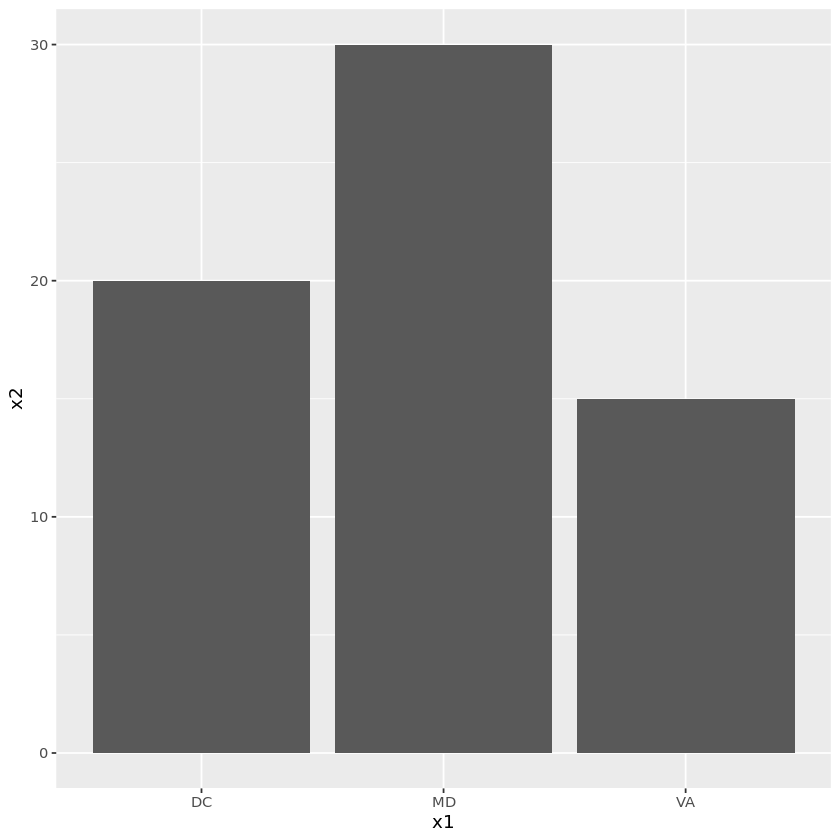

In [5]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2))

## Aesthetic mapping

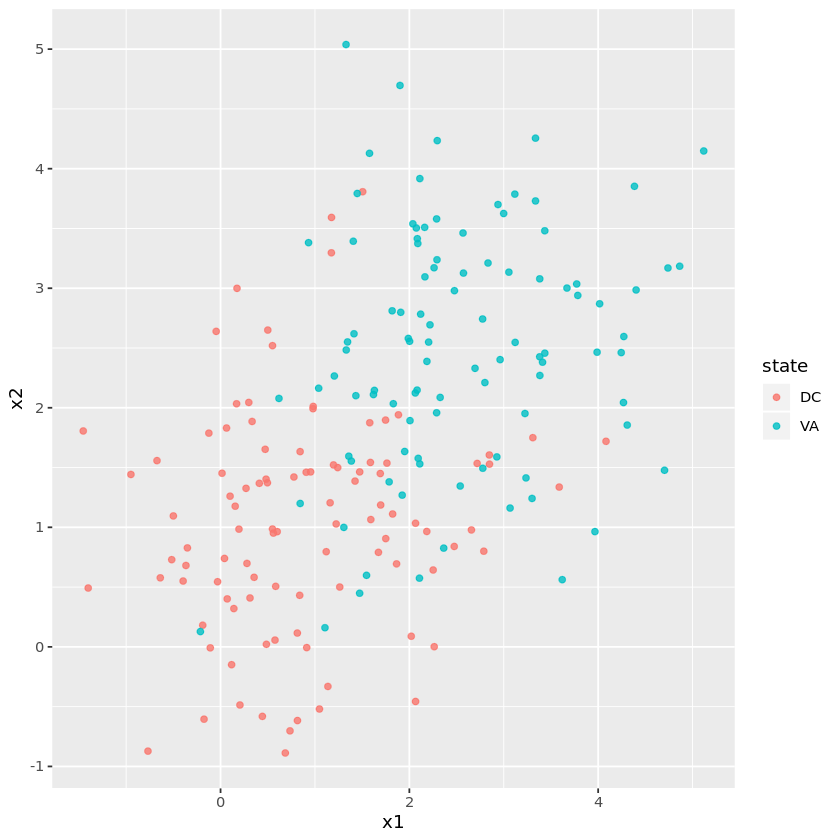

In [6]:
df <- data.frame(
    x1 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    x2 = c(rnorm(100, mean=1, sd=1), rnorm(100, mean=2.5, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8)

## Position

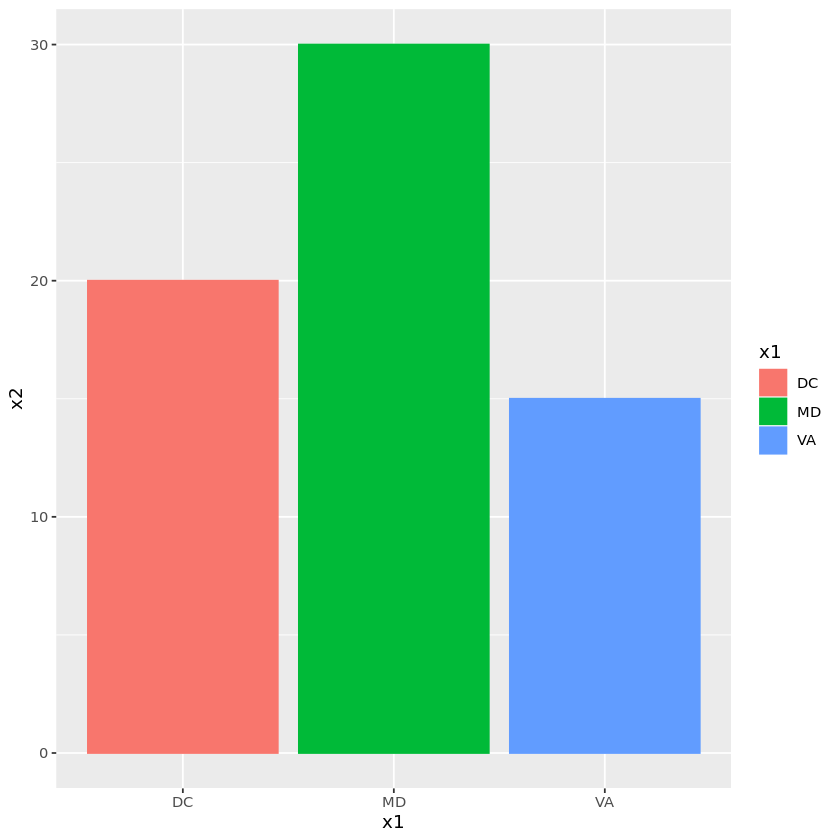

In [7]:
df <- data.frame(
    x1 = c('DC', 'MD', 'VA'),
    x2 = c(20, 30, 15)
)

ggplot(df) +
    geom_col(mapping=aes(x=x1, y=x2, color=x1, fill=x1))

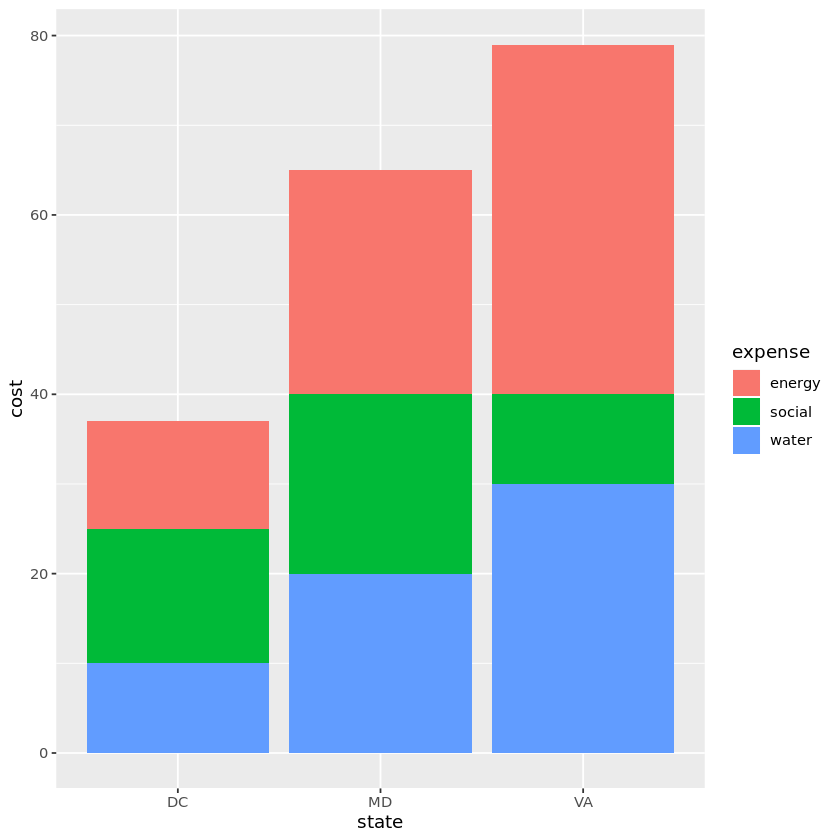

In [8]:
library('tidyr')

df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense))

When `position='fill'`, the stacked bars are forced to 100%.

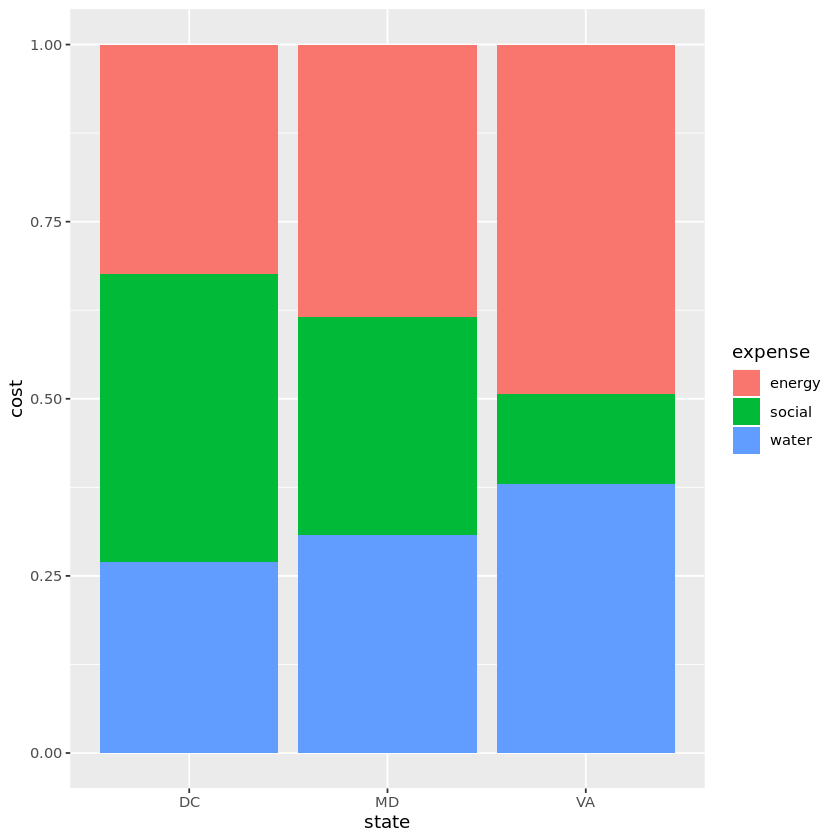

In [9]:
ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='fill')

When `position='dodge` the bars are side-by-side.

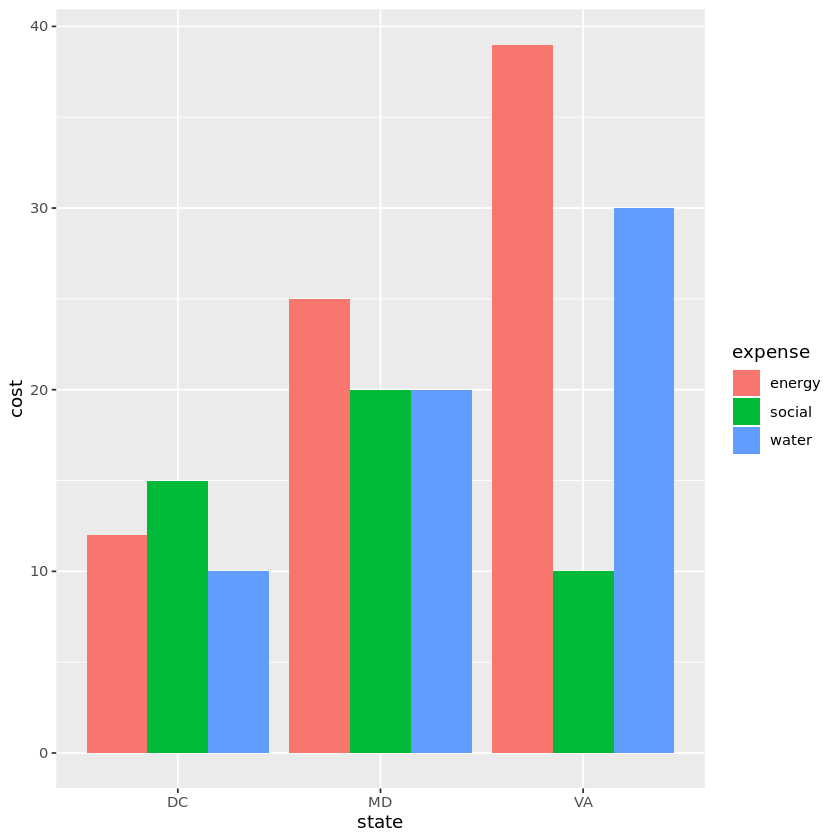

In [10]:
ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge')

## Scale

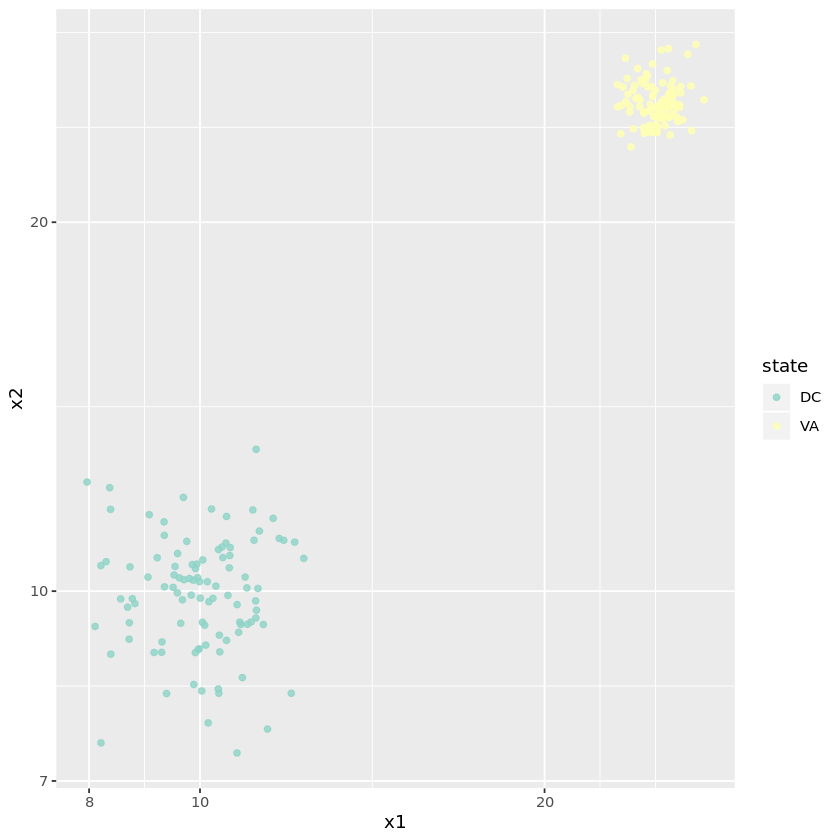

In [25]:
df <- data.frame(
    x1 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    x2 = c(rnorm(100, mean=10, sd=1), rnorm(100, mean=25, sd=1)),
    state = c(rep('DC', 100), rep('VA', 100))
)

ggplot(df) +
    geom_point(mapping=aes(x=x1, y=x2, color=state), alpha=0.8) +
    scale_color_brewer(palette='Set3') +
    scale_x_log10() +
    scale_y_log10()

## Coordinate

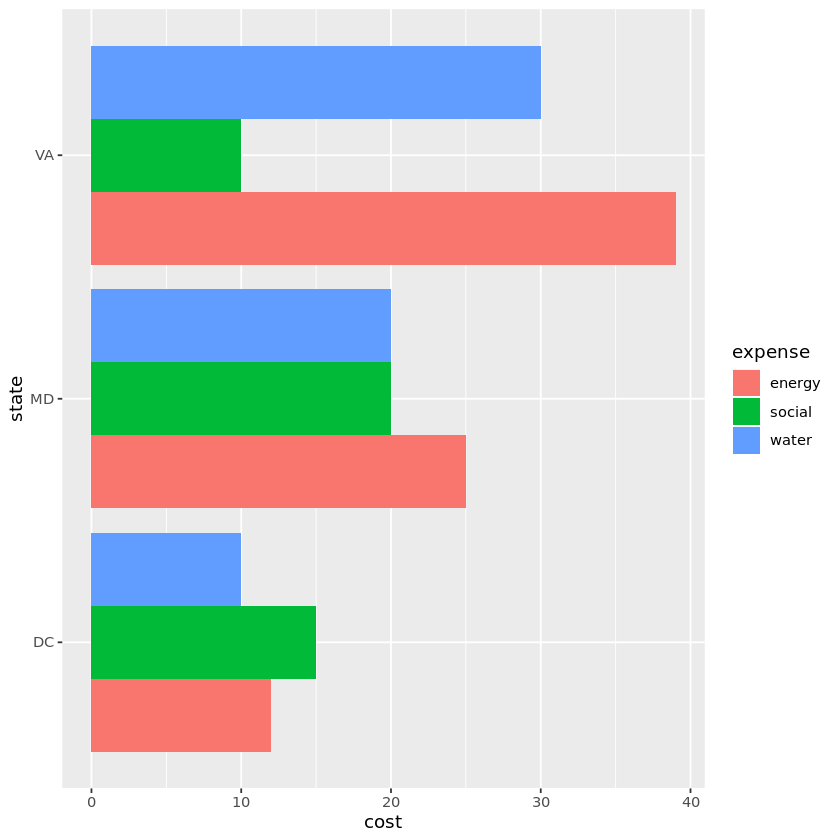

In [16]:
df <- data.frame(
    state = c('DC', 'MD', 'VA'),
    water = c(10, 20, 30),
    energy = c(12, 25, 39),
    social = c(15, 20, 10)
)

n <- df %>%
        pivot_longer(-state, names_to='expense', values_to='cost')

ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_flip()

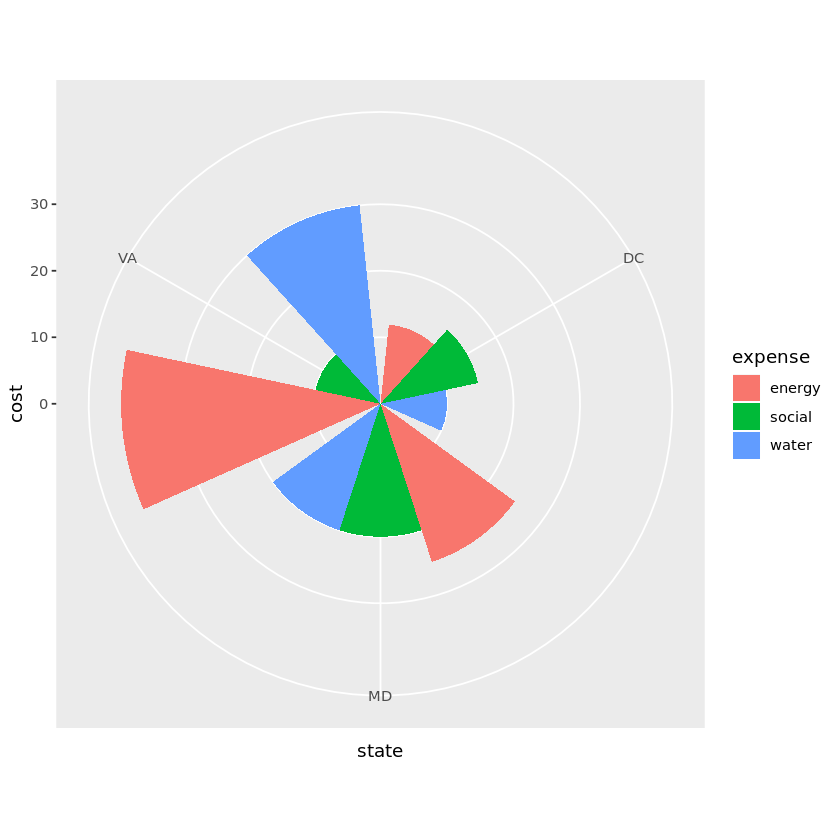

In [17]:
ggplot(n) + 
    geom_col(mapping=aes(x=state, y=cost, fill=expense), position='dodge') +
    coord_polar()